# This notebook is dedicated for the sole purpose of training a model for the karate project

# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib --user

In [3]:
pip install numpy==1.19.5

In [4]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [5]:
import cv2               # Import OpenCV 
import mediapipe as mp   # Import Mediapipe model

# 2. Keypoints using MP Holistic

In [6]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [7]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [8]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [9]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 
    
#     # Draw face landmarks
#     mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_CONTOURS, 
#                               mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
#                               mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
#                               )

In [70]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    
    #this depends on the output video that is going to be put | the video and the internal camera need to be with the same size
    cap.set(3, 1280)
    cap.set(4, 720)
    
    print(cap.get(3))
    print(cap.get(4))
    print(cap.get(cv2.CAP_PROP_FPS))
    
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0
30.0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<

In [71]:
draw_landmarks(frame, results)

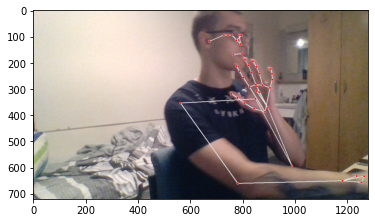

In [72]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [101]:
len(result_test)

258

In [31]:
np.save('test_keypoints_collection', result_test)

In [32]:
np.load('test_keypoints_collection.npy')

array([ 4.96081650e-01, -2.14487091e-01, -1.02159023e+00,  9.94604886e-01,
        5.05097806e-01, -2.49699906e-01, -9.82383609e-01,  9.90979970e-01,
        5.19522786e-01, -2.52962887e-01, -9.82190430e-01,  9.91347015e-01,
        5.33968687e-01, -2.55874902e-01, -9.82666016e-01,  9.90535498e-01,
        4.70689952e-01, -2.80195296e-01, -9.84973729e-01,  9.91541624e-01,
        4.51324075e-01, -2.28875399e-01, -9.84831989e-01,  9.91628230e-01,
        4.39111292e-01, -2.22270310e-01, -9.85356152e-01,  9.92566466e-01,
        5.53987265e-01, -2.07254499e-01, -7.24921525e-01,  9.92223084e-01,
        4.28047955e-01, -1.62319452e-01, -7.21415281e-01,  9.92878139e-01,
        5.26511490e-01, -8.44437256e-02, -9.26895261e-01,  9.92580354e-01,
        4.80778873e-01, -8.21726024e-02, -9.25275445e-01,  9.94775832e-01,
        7.25502849e-01,  1.96788326e-01, -6.11068964e-01,  9.89609301e-01,
        3.47199529e-01,  2.64050514e-01, -5.65901875e-01,  9.94991302e-01,
        9.12624180e-01,  

# 4. Setup Folders for Collection - Mind the sequence

In [141]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data_4Classes') 

# Actions that we try to detect 
actions = np.array(['Point', 'Penalty_1', 'Penalty_2', 'Ignore'])

# Thirty videos worth of data (what if we make then )
no_sequences = 30

# Videos are going to be 30 frames in length - or in other words if the video is recording on 30fps then the videos
# are going to be around 1 second long
sequence_length = 30

# # Folder start
# start_folder = 30

In [124]:
for action in actions: 
#     dirmax = np.max(np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int))
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

### Be careful with the sequence - Only run if you are ready to collect data

In [134]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    
    #this depends on the output video that is going to be put | the video and the internal camera need to be with the same size
    cap.set(3, 1280)
    cap.set(4, 720)
    
    print(cap.get(3))
    print(cap.get(4))
    print(cap.get(cv2.CAP_PROP_FPS))
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through samples aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka samples length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1.5, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Frames for {} Video Number {}'.format(action, sequence), (20,60), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1.75, (0, 0, 255), 3, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(3000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (20,60), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1.75, (0, 0, 255), 3, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0
30.0


In [44]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [125]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [126]:
# Return the original lables in the actions variable
actions = np.array(['Point', 'Penalty_1', 'Penalty_2', 'Ignore'])

In [127]:
actions

array(['Point', 'Penalty_1', 'Penalty_2', 'Ignore'], dtype='<U9')

In [142]:
label_map = {label:num for num, label in enumerate(actions)}

In [143]:
label_map

{'Point': 0, 'Penalty_1': 1, 'Penalty_2': 2, 'Ignore': 3}

In [191]:
sequences, labels = [], []
for action in actions:
    for sequence in np.array(os.listdir(os.path.join(DATA_PATH, action))).astype(int):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [192]:
np.array(sequences).shape

(100, 30, 258)

In [193]:
np.array(labels).shape

(100,)

In [194]:
X = np.array(sequences)

In [195]:
X.shape

(100, 30, 258)

In [196]:
y = to_categorical(labels).astype(int)

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [240]:
y_test.shape

(10, 4)

# 7. Build and Train LSTM Neural Network

In [153]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [154]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [258]:
del model

In [259]:
# Original Model 

model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [242]:
# Dropout added to the original model

model = Sequential()
model.add(LSTM(256, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu', recurrent_dropout=0.1, dropout=0.1))
model.add(Dropout(0.3))
model.add(LSTM(64, return_sequences=False, activation='relu', recurrent_dropout=0.1, dropout=0.1))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [260]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [261]:
history = model.fit(X_train, y_train, epochs=60, callbacks=[tb_callback], validation_data=(X_test, y_test))

Epoch 1/60
3/3 [==============================] - 5s 979ms/step - loss: 1.3837 - categorical_accuracy: 0.2845 - val_loss: 1.3167 - val_categorical_accuracy: 0.4000
Epoch 2/60
3/3 [==============================] - 0s 102ms/step - loss: 1.3829 - categorical_accuracy: 0.3509 - val_loss: 1.2077 - val_categorical_accuracy: 0.4000
Epoch 3/60
3/3 [==============================] - 0s 82ms/step - loss: 1.2808 - categorical_accuracy: 0.3970 - val_loss: 1.2231 - val_categorical_accuracy: 0.6000
Epoch 4/60
3/3 [==============================] - 0s 90ms/step - loss: 1.2088 - categorical_accuracy: 0.4354 - val_loss: 1.2387 - val_categorical_accuracy: 0.5000
Epoch 5/60
3/3 [==============================] - 0s 92ms/step - loss: 1.2922 - categorical_accuracy: 0.5023 - val_loss: 1.1801 - val_categorical_accuracy: 0.3000
Epoch 6/60
3/3 [==============================] - 0s 86ms/step - loss: 1.2137 - categorical_accuracy: 0.2522 - val_loss: 1.0796 - val_categorical_accuracy: 0.4000
Epoch 7/60
3/3 [====

Epoch 51/60
3/3 [==============================] - 0s 83ms/step - loss: 0.3474 - categorical_accuracy: 0.8714 - val_loss: 0.1748 - val_categorical_accuracy: 0.9000
Epoch 52/60
3/3 [==============================] - 0s 88ms/step - loss: 0.3705 - categorical_accuracy: 0.8307 - val_loss: 0.1810 - val_categorical_accuracy: 0.9000
Epoch 53/60
3/3 [==============================] - 0s 85ms/step - loss: 0.3182 - categorical_accuracy: 0.8943 - val_loss: 0.1936 - val_categorical_accuracy: 0.9000
Epoch 54/60
3/3 [==============================] - 0s 85ms/step - loss: 0.3194 - categorical_accuracy: 0.8859 - val_loss: 0.1797 - val_categorical_accuracy: 1.0000
Epoch 55/60
3/3 [==============================] - 0s 86ms/step - loss: 0.3562 - categorical_accuracy: 0.8274 - val_loss: 0.2155 - val_categorical_accuracy: 1.0000
Epoch 56/60
3/3 [==============================] - 0s 85ms/step - loss: 0.4144 - categorical_accuracy: 0.8007 - val_loss: 0.2322 - val_categorical_accuracy: 0.9000
Epoch 57/60
3/3 

In [203]:
del model

In [207]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 30, 256)           527360    
_________________________________________________________________
lstm_13 (LSTM)               (None, 30, 128)           197120    
_________________________________________________________________
dropout_12 (Dropout)         (None, 30, 128)           0         
_________________________________________________________________
lstm_14 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_14 (Dropout)         (None, 64)               

### Make visualisations 

In [208]:
import matplotlib.pyplot as plt
%matplotlib inline

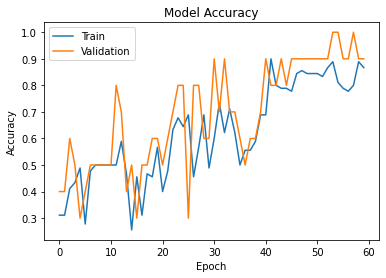

In [262]:
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

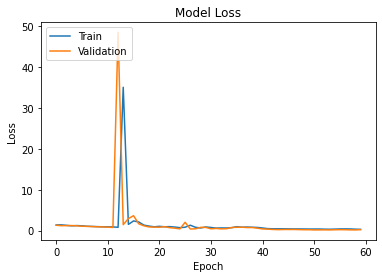

In [263]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# 8. Make Predictions

In [264]:
res = model.predict(X_test)

In [265]:
res.shape[0]

10

In [266]:
results_arr = [actions[np.argmax(res[i])] for i in range(res.shape[0])]

In [267]:
actual_results_arr = [actions[np.argmax(y_test[i])] for i in range(res.shape[0])]

In [268]:
results_arr

['Ignore',
 'Point',
 'Ignore',
 'Ignore',
 'Penalty_1',
 'Penalty_1',
 'Point',
 'Ignore',
 'Penalty_2',
 'Ignore']

In [269]:
actual_results_arr

['Point',
 'Point',
 'Ignore',
 'Ignore',
 'Penalty_1',
 'Penalty_1',
 'Point',
 'Ignore',
 'Penalty_2',
 'Ignore']

# 9. Save Model

In [278]:
model.save('actionDetection_4Classes_02.h5')

In [168]:
del model

In [279]:
model.load_weights('actionDetection_4Classes_02.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [176]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix

In [270]:
yhat = model.predict(X_test)

In [271]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [280]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[7, 0],
        [1, 2]],

       [[8, 0],
        [0, 2]],

       [[9, 0],
        [0, 1]],

       [[5, 1],
        [0, 4]]], dtype=int64)

In [273]:
accuracy_score(ytrue, yhat)

0.9

In [298]:
cf_matrix = confusion_matrix(ytrue, yhat)

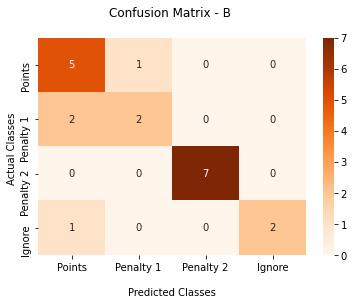

In [299]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.heatmap(cf_matrix, annot=True, cmap='Oranges')

ax.set_title('Confusion Matrix - B \n');
ax.set_xlabel('\nPredicted Classes')
ax.set_ylabel('Actual Classes ');

# Set labels for the classes
ax.xaxis.set_ticklabels(['Points', 'Penalty 1', 'Penalty 2', 'Ignore'])
ax.yaxis.set_ticklabels(['Points', 'Penalty 1', 'Penalty 2', 'Ignore'])

plt.show()

# 11. Test in Real Time

In [1]:
!pip install tensorflow==2.4.1 tensorflow-gpu==2.4.1 opencv-python mediapipe sklearn matplotlib --user

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [7]:
# Change this if needed 

actions = np.array(['Point', 'Penalty', 'Ignore'])

In [8]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, lh, rh])

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [10]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,258)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [11]:
model.load_weights('actionDetection_50P.h5')

In [281]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_30 (LSTM)               (None, 30, 64)            82688     
_________________________________________________________________
lstm_31 (LSTM)               (None, 30, 128)           98816     
_________________________________________________________________
lstm_32 (LSTM)               (None, 64)                49408     
_________________________________________________________________
dense_30 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_31 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 132       
Total params: 237,284
Trainable params: 237,284
Non-trainable params: 0
_______________________________________________

In [282]:
from scipy import stats

In [283]:
colors = [(245,117,16), (117,245,16), (255, 0, 137), (16,117,245)]
# colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [76]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1296x1296 with 0 Axes>

In [284]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.7

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

    
    #this depends on the output video that is going to be put | the video and the internal camera need to be with the same size
    cap.set(3, 1280)
    cap.set(4, 720)
    
    print(cap.get(3))
    print(cap.get(4))
    print(cap.get(cv2.CAP_PROP_FPS))
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): # This code is holding the a specific prediction for 10 frames before it confirms that it is trully the one that we want (better for transitioning between classes)
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:  
                            
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append("NoN")

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

640.0
480.0
1280.0
720.0
30.0
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.S

Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Point
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solutio

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Ignore
<class 'mediapipe.python.solution_base.S

<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_1
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penalty_2
<class 'mediapipe.python.solution_base.SolutionOutputs'>
Penal

In [125]:
    cap.release()
    cv2.destroyAllWindows()